In [8]:
import os
import nltk

file_paths = []
for _, __, files in os.walk('neg/neg'):
    for file in files:
        file_paths.append(file)
file_paths = file_paths
file_paths

['cv000_29416.txt',
 'cv001_19502.txt',
 'cv002_17424.txt',
 'cv003_12683.txt',
 'cv004_12641.txt',
 'cv005_29357.txt',
 'cv006_17022.txt',
 'cv007_4992.txt',
 'cv008_29326.txt',
 'cv009_29417.txt',
 'cv010_29063.txt',
 'cv011_13044.txt',
 'cv012_29411.txt',
 'cv013_10494.txt',
 'cv014_15600.txt',
 'cv015_29356.txt',
 'cv016_4348.txt',
 'cv017_23487.txt',
 'cv018_21672.txt',
 'cv019_16117.txt',
 'cv020_9234.txt',
 'cv021_17313.txt',
 'cv022_14227.txt',
 'cv023_13847.txt',
 'cv024_7033.txt',
 'cv025_29825.txt',
 'cv026_29229.txt',
 'cv027_26270.txt',
 'cv028_26964.txt',
 'cv029_19943.txt',
 'cv030_22893.txt',
 'cv031_19540.txt',
 'cv032_23718.txt',
 'cv033_25680.txt',
 'cv034_29446.txt',
 'cv035_3343.txt',
 'cv036_18385.txt',
 'cv037_19798.txt',
 'cv038_9781.txt',
 'cv039_5963.txt',
 'cv040_8829.txt',
 'cv041_22364.txt',
 'cv042_11927.txt',
 'cv043_16808.txt',
 'cv044_18429.txt',
 'cv045_25077.txt',
 'cv046_10613.txt',
 'cv047_18725.txt',
 'cv048_18380.txt',
 'cv049_21917.txt',
 'cv050_

## Read files

In [11]:
import os

folder_path = 'neg/neg'

file_contents = []

files = os.listdir(folder_path)

for file_name in files:  
    if file_name.endswith('.txt'): 
        file_path = os.path.join(folder_path, file_name)
        with open(file_path, 'r', encoding='utf-8') as file:
            content = file.read()
            file_contents.append(content)

In [12]:
documents = file_contents.copy()

## Remove stop words

In [14]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
import string

stop_words = stopwords.words('english')


res = []
for document in documents:
    new_doc = []
    for i in word_tokenize(document):
        if i not in stop_words and i not in string.punctuation:
            new_doc.append(i)
    res.append(new_doc)

## Lemmatization

In [16]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
lem = []
for sent in res:
    new_doc = []
    for word in sent:
        new_doc.append(lemmatizer.lemmatize(word))
    lem.append(new_doc)

In [17]:
lem[0][:10]  #lấy ra 10 chữ cái đầu của document 1 sau khi lemmatize

['plot',
 'two',
 'teen',
 'couple',
 'go',
 'church',
 'party',
 'drink',
 'drive',
 'get']

## Stemming

In [24]:
from nltk.stem import LancasterStemmer


stemmer = LancasterStemmer()
stem = []
for sent in lem:
    new_doc = []
    for word in sent:
        new_doc.append(stemmer.stem(word))
    stem.append(new_doc)

In [25]:
stem[0][:10] #lấy ra 10 chữ cái đầu của document 1 sau khi stemming

['plot',
 'two',
 'teen',
 'coupl',
 'go',
 'church',
 'party',
 'drink',
 'driv',
 'get']

## TF-IDF matrix

In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer


documents = [' '.join(doc) for doc in stem]
def preprocess(text):
    tokens = word_tokenize(text.lower())
    tokens = [word for word in tokens if word not in string.punctuation]
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    return ' '.join(tokens)

processed_documents = [preprocess(doc) for doc in documents]

vectorizer = TfidfVectorizer()

tfidf_matrix = vectorizer.fit_transform(processed_documents)

print('TF-IDF matrix:')
print(tfidf_matrix.toarray())

TF-IDF matrix:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [49]:
type(tfidf_matrix)

scipy.sparse._csr.csr_matrix

In [51]:
features = vectorizer.get_feature_names_out()
features #cắc đặc trưng của ma trận IF-TDF

array(['00', '000', '007', ..., 'zwick', 'zwigoff', 'zzzzzzz'],
      dtype=object)

In [53]:
import pandas as pd

df = pd.DataFrame(tfidf_matrix.toarray(), columns = features)
df

,00,000,007,00s,05,10,100,1000,100m,101,...,zoolog,zoologists,zoom,zoot,zorro,zsigmond,zuck,zwick,zwigoff,zzzzzzz
0,0.0,0.0,0.0,0.0,0.0,0.421036,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
661,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
662,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
663,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
664,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

def cosine_similarity1(row1, row2):
    dot = row1.dot(row2)
    norm1, norm2 = np.linalg.norm(row1), np.linalg.norm(row2)
    return dot/(norm1 * norm2)

In [151]:
def cosine_similarity_matrix(df: pd.DataFrame):
    res = []
    for i in range(len(df)):
        row = []
        for j in range(len(df)):
            row.append(cosine_similarity(df.loc[i], df.loc[j]))
        res.append(row)
    return np.array(res)

In [153]:
cosine_similarity(df)

array([[1.        , 0.10784786, 0.15412646, ..., 0.06348987, 0.02901015,
        0.04387097],
       [0.10784786, 1.        , 0.04965289, ..., 0.0280824 , 0.03027445,
        0.03049788],
       [0.15412646, 0.04965289, 1.        , ..., 0.05890468, 0.04082111,
        0.0457364 ],
       ...,
       [0.06348987, 0.0280824 , 0.05890468, ..., 1.        , 0.0281941 ,
        0.03433945],
       [0.02901015, 0.03027445, 0.04082111, ..., 0.0281941 , 1.        ,
        0.02259831],
       [0.04387097, 0.03049788, 0.0457364 , ..., 0.03433945, 0.02259831,
        1.        ]])

In [57]:
cosine_df = pd.DataFrame(cosine_similarity(df), index=range(666), columns=range(666))

In [59]:
X = cosine_df.values
cosine_df

,0,1,2,3,4,5,6,7,8,9,...,656,657,658,659,660,661,662,663,664,665
0,1.000000,0.107848,0.154126,0.058463,0.057760,0.072230,0.070596,0.051487,0.047912,0.229921,...,0.093983,0.067413,0.070533,0.083916,0.099025,0.068392,0.090423,0.063490,0.029010,0.043871
1,0.107848,1.000000,0.049653,0.014690,0.039403,0.038743,0.034402,0.045166,0.034797,0.056699,...,0.052855,0.071455,0.019536,0.039136,0.062328,0.045150,0.039750,0.028082,0.030274,0.030498
2,0.154126,0.049653,1.000000,0.074993,0.063639,0.073804,0.065161,0.049647,0.042815,0.113009,...,0.073635,0.058979,0.046519,0.068313,0.129703,0.054630,0.053330,0.058905,0.040821,0.045736
3,0.058463,0.014690,0.074993,1.000000,0.035737,0.030613,0.032090,0.027827,0.034801,0.063383,...,0.046233,0.022651,0.031920,0.053070,0.054751,0.041785,0.034644,0.040300,0.033221,0.022654
4,0.057760,0.039403,0.063639,0.035737,1.000000,0.033938,0.037147,0.029645,0.029532,0.045014,...,0.049499,0.043287,0.039060,0.057277,0.043656,0.030759,0.042754,0.055585,0.033223,0.021517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
661,0.068392,0.045150,0.054630,0.041785,0.030759,0.037882,0.045123,0.039268,0.030153,0.066009,...,0.063529,0.036002,0.038770,0.053790,0.079842,1.000000,0.027781,0.032649,0.042133,0.016778
662,0.090423,0.039750,0.053330,0.034644,0.042754,0.037607,0.071152,0.031097,0.015348,0.039044,...,0.078884,0.056384,0.040788,0.043736,0.057652,0.027781,1.000000,0.051720,0.029071,0.026496
663,0.063490,0.028082,0.058905,0.040300,0.055585,0.043633,0.064198,0.040757,0.030115,0.064406,...,0.061802,0.048961,0.046353,0.045959,0.059426,0.032649,0.051720,1.000000,0.028194,0.034339
664,0.029010,0.030274,0.040821,0.033221,0.033223,0.032736,0.057889,0.052369,0.034047,0.045867,...,0.172474,0.033723,0.080410,0.026505,0.029068,0.042133,0.029071,0.028194,1.000000,0.022598


In [61]:
from sklearn.cluster import AgglomerativeClustering

cosine_df

,0,1,2,3,4,5,6,7,8,9,...,656,657,658,659,660,661,662,663,664,665
0,1.000000,0.107848,0.154126,0.058463,0.057760,0.072230,0.070596,0.051487,0.047912,0.229921,...,0.093983,0.067413,0.070533,0.083916,0.099025,0.068392,0.090423,0.063490,0.029010,0.043871
1,0.107848,1.000000,0.049653,0.014690,0.039403,0.038743,0.034402,0.045166,0.034797,0.056699,...,0.052855,0.071455,0.019536,0.039136,0.062328,0.045150,0.039750,0.028082,0.030274,0.030498
2,0.154126,0.049653,1.000000,0.074993,0.063639,0.073804,0.065161,0.049647,0.042815,0.113009,...,0.073635,0.058979,0.046519,0.068313,0.129703,0.054630,0.053330,0.058905,0.040821,0.045736
3,0.058463,0.014690,0.074993,1.000000,0.035737,0.030613,0.032090,0.027827,0.034801,0.063383,...,0.046233,0.022651,0.031920,0.053070,0.054751,0.041785,0.034644,0.040300,0.033221,0.022654
4,0.057760,0.039403,0.063639,0.035737,1.000000,0.033938,0.037147,0.029645,0.029532,0.045014,...,0.049499,0.043287,0.039060,0.057277,0.043656,0.030759,0.042754,0.055585,0.033223,0.021517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
661,0.068392,0.045150,0.054630,0.041785,0.030759,0.037882,0.045123,0.039268,0.030153,0.066009,...,0.063529,0.036002,0.038770,0.053790,0.079842,1.000000,0.027781,0.032649,0.042133,0.016778
662,0.090423,0.039750,0.053330,0.034644,0.042754,0.037607,0.071152,0.031097,0.015348,0.039044,...,0.078884,0.056384,0.040788,0.043736,0.057652,0.027781,1.000000,0.051720,0.029071,0.026496
663,0.063490,0.028082,0.058905,0.040300,0.055585,0.043633,0.064198,0.040757,0.030115,0.064406,...,0.061802,0.048961,0.046353,0.045959,0.059426,0.032649,0.051720,1.000000,0.028194,0.034339
664,0.029010,0.030274,0.040821,0.033221,0.033223,0.032736,0.057889,0.052369,0.034047,0.045867,...,0.172474,0.033723,0.080410,0.026505,0.029068,0.042133,0.029071,0.028194,1.000000,0.022598


In [63]:
pd.DataFrame(tfidf_matrix.toarray())

,0,1,2,3,4,5,6,7,8,9,...,14806,14807,14808,14809,14810,14811,14812,14813,14814,14815
0,0.0,0.0,0.0,0.0,0.0,0.421036,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
661,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
662,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
663,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
664,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [65]:
cosine_similarity1(df.loc[2], df.loc[4])

0.06363866843212443

## Dimensionality reduction

In [108]:
from sklearn.decomposition import PCA

components = 2
decomposer = PCA(n_components=2) #giảm chiều dữ liệu về 2
decomposer.fit(df)

PCA(n_components=2)

In [110]:
reduced = decomposer.transform(df)

Text(0.5, 1.0, 'Data after using PCA')

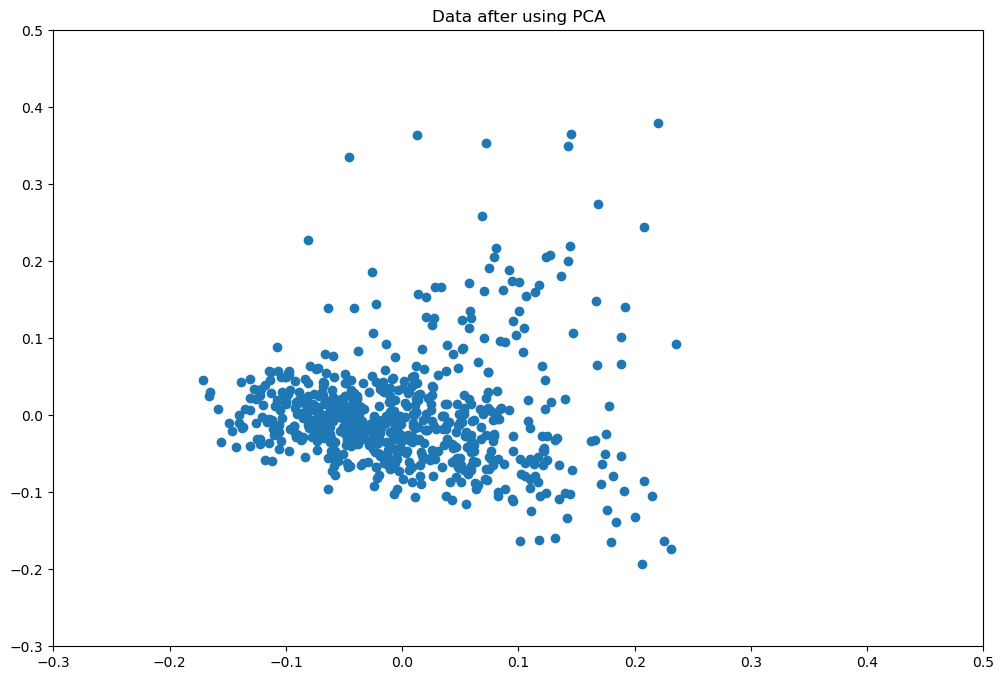

In [158]:
plt.figure(figsize=(12, 8))
plt.xlim(-0.3,0.5)
plt.ylim(-0.3,0.5)
plt.scatter(x=reduced[:,0], y=reduced[:,1])
plt.title('Data after using PCA')

## Using DBSCAN 

Để chọn giá trị thích hợp cho epsilon, ta vẽ thừ k-distance graph.

Text(0.5, 1.0, 'Sorting Maximum Distance in k Nearest Neighbor of kNN')

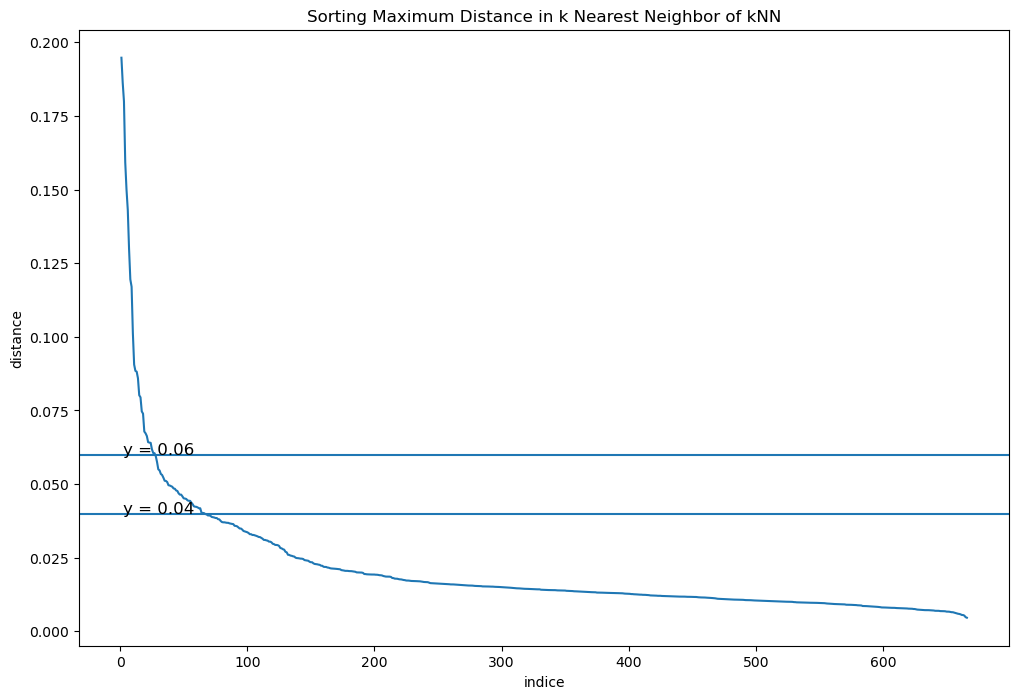

In [137]:
from sklearn.neighbors import NearestNeighbors


neighbors = 10
nbrs = NearestNeighbors(n_neighbors=neighbors ).fit(reduced)

# Ma trận khoảng cách distances: (N, k)
distances, indices = nbrs.kneighbors(reduced)

# Lấy ra khoảng cách xa nhất từ phạm vi láng giềng của mỗi điểm và sắp xếp theo thứ tự giảm dần.
distance_desc = sorted(distances[:, neighbors-1], reverse=True)

plt.figure(figsize=(12, 8))
plt.plot(list(range(1,len(distance_desc )+1)), distance_desc)
plt.axhline(y=0.06)
plt.text(2, 0.06, 'y = 0.06', fontsize=12)
plt.axhline(y=0.04)
plt.text(2, 0.04, 'y = 0.04', fontsize=12)
plt.ylabel('distance')
plt.xlabel('indice')
plt.title('Sorting Maximum Distance in k Nearest Neighbor of kNN')

Ta thấy giá trị nằm trong [0.04, 0.06] là thích hợp.

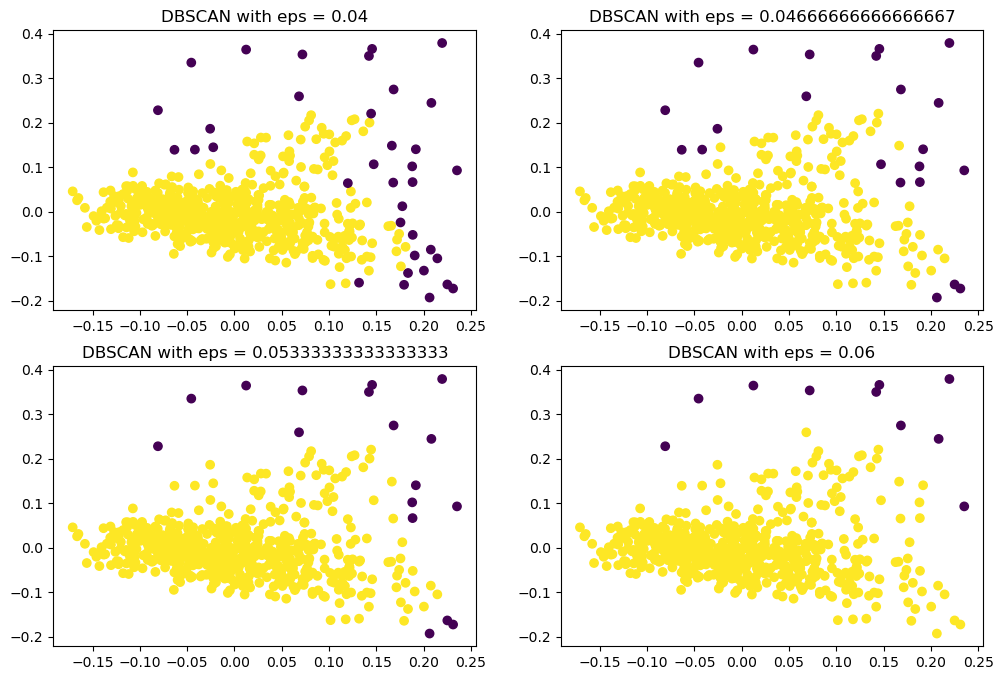

<Figure size 1200x400 with 0 Axes>

In [146]:
from sklearn.cluster import DBSCAN


fig, ax = plt.subplots(2,2, figsize = (12, 8))
plt.figure(figsize=(12, 4))

eps = np.linspace(0.04, 0.06, 4)
k = 0
for i in range(2):
    for j in range(2):
        model = DBSCAN(eps=eps[k], min_samples=11)
        y_pred = model.fit_predict(reduced)
        ax[i, j].scatter(reduced[:,0], y=reduced[:, 1], c=y_pred)
        ax[i, j].title.set_text(f'DBSCAN with eps = {eps[k]}')
        k += 1

Ta thấy phương pháp hoạt động tốt với epsilon = 0.06

## KMeans

In [172]:
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV

kmeans = KMeans()
param_grid = {'n_clusters': range(1, 6), 'algorithm': ['lloyd', 'elkan']}
grid_cv = GridSearchCV(estimator=kmeans, param_grid=param_grid, refit=True)
grid_cv.fit(reduced)

D:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
D:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
D:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
D:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows wi

GridSearchCV(estimator=KMeans(),
             param_grid={'algorithm': ['lloyd', 'elkan'],
                         'n_clusters': range(1, 6)})

Ta xem xét các kết quả train mô hình trên những tổ hợp siêu tham số khác nhau.

In [176]:
pd.DataFrame(grid_cv.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algorithm,param_n_clusters,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.071347,0.006966,0.038079,0.004638,lloyd,1,"{'algorithm': 'lloyd', 'n_clusters': 1}",-1.701714,-1.509741,-1.534550,-1.477979,-1.477292,-1.540255,0.083517,9
1,0.079566,0.005057,0.036627,0.004430,lloyd,2,"{'algorithm': 'lloyd', 'n_clusters': 2}",-1.184048,-0.889689,-0.945432,-0.927520,-1.020660,-0.993470,0.104391,8
2,0.073566,0.005701,0.034261,0.002830,lloyd,3,"{'algorithm': 'lloyd', 'n_clusters': 3}",-0.625267,-0.587048,-0.590093,-0.539536,-0.530143,-0.574417,0.035122,5
3,0.074030,0.007803,0.041725,0.002243,lloyd,4,"{'algorithm': 'lloyd', 'n_clusters': 4}",-0.517916,-0.449183,-0.463474,-0.404612,-0.398287,-0.446694,0.043530,4
4,0.081277,0.004477,0.040685,0.004288,lloyd,5,"{'algorithm': 'lloyd', 'n_clusters': 5}",-0.456428,-0.404556,-0.401187,-0.362171,-0.364820,-0.397833,0.034210,2
5,0.078844,0.009557,0.035977,0.004159,elkan,1,"{'algorithm': 'elkan', 'n_clusters': 1}",-1.701714,-1.509741,-1.534550,-1.477979,-1.477292,-1.540255,0.083517,9
6,0.004483,0.000990,0.035239,0.003069,elkan,2,"{'algorithm': 'elkan', 'n_clusters': 2}",-1.080974,-0.889689,-0.943524,-0.927520,-0.932794,-0.954900,0.065597,7
7,0.004618,0.000454,0.036261,0.003891,elkan,3,"{'algorithm': 'elkan', 'n_clusters': 3}",-0.625267,-0.594767,-0.590093,-0.539124,-0.530143,-0.575879,0.035891,6
8,0.005367,0.000888,0.036109,0.003568,elkan,4,"{'algorithm': 'elkan', 'n_clusters': 4}",-0.519715,-0.448026,-0.463474,-0.404568,-0.390724,-0.445301,0.045854,3
9,0.005907,0.000962,0.039474,0.003619,elkan,5,"{'algorithm': 'elkan', 'n_clusters': 5}",-0.450519,-0.428801,-0.387934,-0.333826,-0.372318,-0.394680,0.041306,1


In [178]:
grid_cv.best_estimator_

KMeans(algorithm='elkan', n_clusters=5)

In [182]:
y_pred = grid_cv.predict(reduced)

Text(0.5, 1.0, 'Using KMeans')

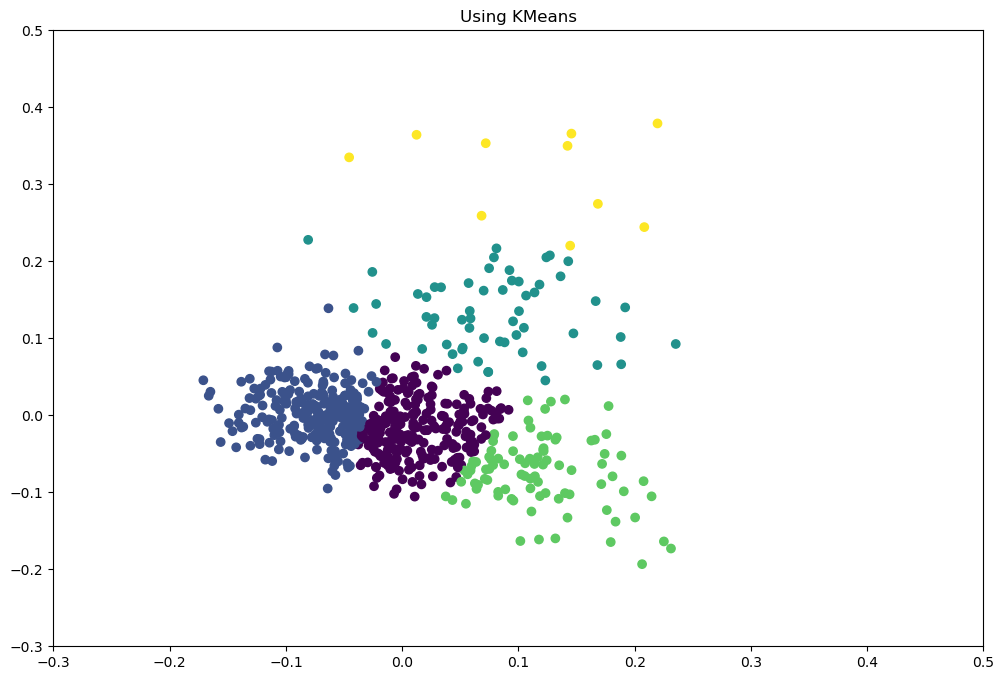

In [185]:
plt.figure(figsize=(12, 8))
plt.xlim(-0.3,0.5)
plt.ylim(-0.3,0.5)
plt.scatter(x=reduced[:,0], y=reduced[:,1], c=y_pred)
plt.title('Using KMeans')

Ta thấy thuật toán hoạt động không tốt do sự phân bố chênh lệch và không theo cụm dạng tròn của dữ liệu.

## KMeans clustering using Elbow method

D:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
D:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
D:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
D:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows wi

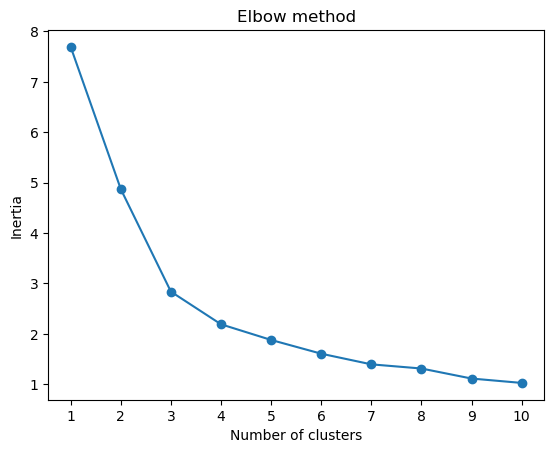

In [245]:
inertias = []

for i in range(1, 11):
    model = KMeans(n_clusters=i)
    model.fit(reduced).predict(reduced)
    inertias.append(model.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.xticks(range(1,11))
plt.show()

Sử dụng phương pháp Elbow cho ta thấy số cụm cần khởi tạo là 3.

In [248]:
model = KMeans(n_clusters=3)
model.fit(reduced).predict(reduced)
y_pred = model.predict(reduced)

D:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Text(0.5, 1.0, 'Using KMeans with Elbow method')

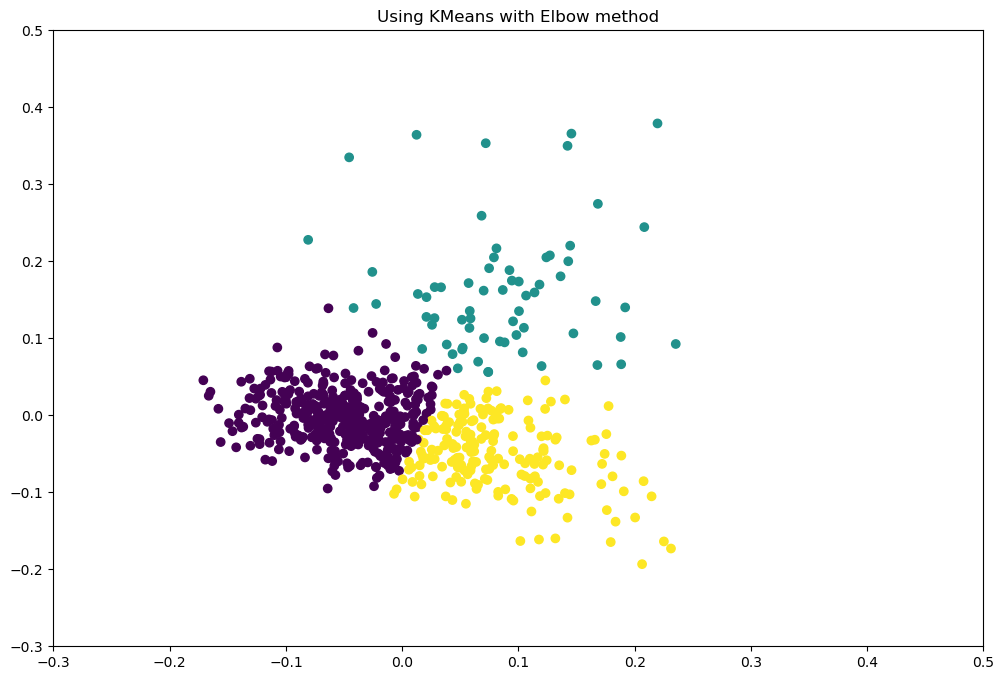

In [250]:
plt.figure(figsize=(12, 8))
plt.xlim(-0.3,0.5)
plt.ylim(-0.3,0.5)
plt.scatter(x=reduced[:,0], y=reduced[:,1], c=y_pred)
plt.title('Using KMeans with Elbow method')

## Compare the similarity between any two documents

In [255]:
cosine_df = pd.DataFrame(cosine_similarity(df), index=range(666), columns=range(666))
cosine_df

,0,1,2,3,4,5,6,7,8,9,...,656,657,658,659,660,661,662,663,664,665
0,1.000000,0.107848,0.154126,0.058463,0.057760,0.072230,0.070596,0.051487,0.047912,0.229921,...,0.093983,0.067413,0.070533,0.083916,0.099025,0.068392,0.090423,0.063490,0.029010,0.043871
1,0.107848,1.000000,0.049653,0.014690,0.039403,0.038743,0.034402,0.045166,0.034797,0.056699,...,0.052855,0.071455,0.019536,0.039136,0.062328,0.045150,0.039750,0.028082,0.030274,0.030498
2,0.154126,0.049653,1.000000,0.074993,0.063639,0.073804,0.065161,0.049647,0.042815,0.113009,...,0.073635,0.058979,0.046519,0.068313,0.129703,0.054630,0.053330,0.058905,0.040821,0.045736
3,0.058463,0.014690,0.074993,1.000000,0.035737,0.030613,0.032090,0.027827,0.034801,0.063383,...,0.046233,0.022651,0.031920,0.053070,0.054751,0.041785,0.034644,0.040300,0.033221,0.022654
4,0.057760,0.039403,0.063639,0.035737,1.000000,0.033938,0.037147,0.029645,0.029532,0.045014,...,0.049499,0.043287,0.039060,0.057277,0.043656,0.030759,0.042754,0.055585,0.033223,0.021517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
661,0.068392,0.045150,0.054630,0.041785,0.030759,0.037882,0.045123,0.039268,0.030153,0.066009,...,0.063529,0.036002,0.038770,0.053790,0.079842,1.000000,0.027781,0.032649,0.042133,0.016778
662,0.090423,0.039750,0.053330,0.034644,0.042754,0.037607,0.071152,0.031097,0.015348,0.039044,...,0.078884,0.056384,0.040788,0.043736,0.057652,0.027781,1.000000,0.051720,0.029071,0.026496
663,0.063490,0.028082,0.058905,0.040300,0.055585,0.043633,0.064198,0.040757,0.030115,0.064406,...,0.061802,0.048961,0.046353,0.045959,0.059426,0.032649,0.051720,1.000000,0.028194,0.034339
664,0.029010,0.030274,0.040821,0.033221,0.033223,0.032736,0.057889,0.052369,0.034047,0.045867,...,0.172474,0.033723,0.080410,0.026505,0.029068,0.042133,0.029071,0.028194,1.000000,0.022598


Đây là ma trận tính độ tương tự cosine giữa các tài liệu, trong đó yếu tố (i, j) chỉ độ tương tự cosine giữa document i và document j.